# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pickle import dump
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'

data = pd.read_csv(url, delimiter=',')
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
X = data[['Latitude', 'Longitude', 'MedInc']]  
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

KMeans_Model = KMeans(n_clusters=6, random_state=42)
KMeans_Model.fit(X_train_scaled)



,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


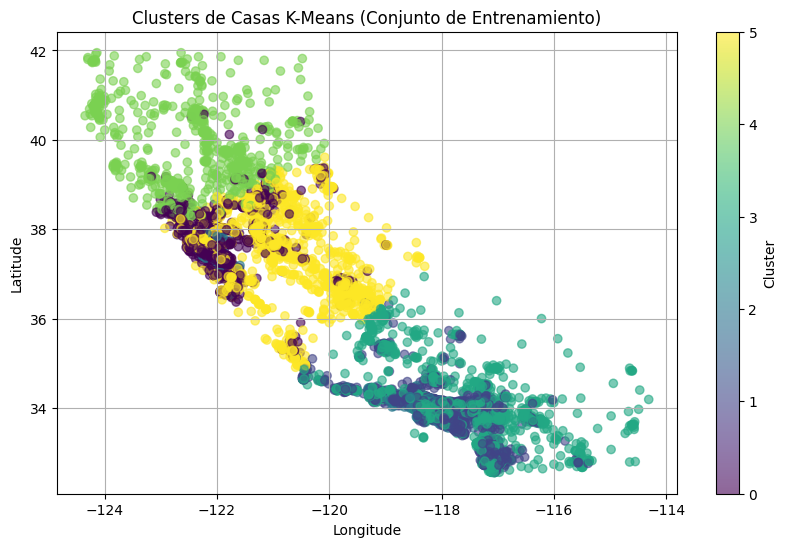

In [5]:
X_train["cluster"] = KMeans_Model.labels_.astype(int)


plt.figure(figsize=(10, 6))
plt.scatter(X_train['Longitude'], X_train['Latitude'], c=X_train['cluster'], cmap='viridis', alpha=0.6)
plt.title('Clusters de Casas K-Means (Conjunto de Entrenamiento)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

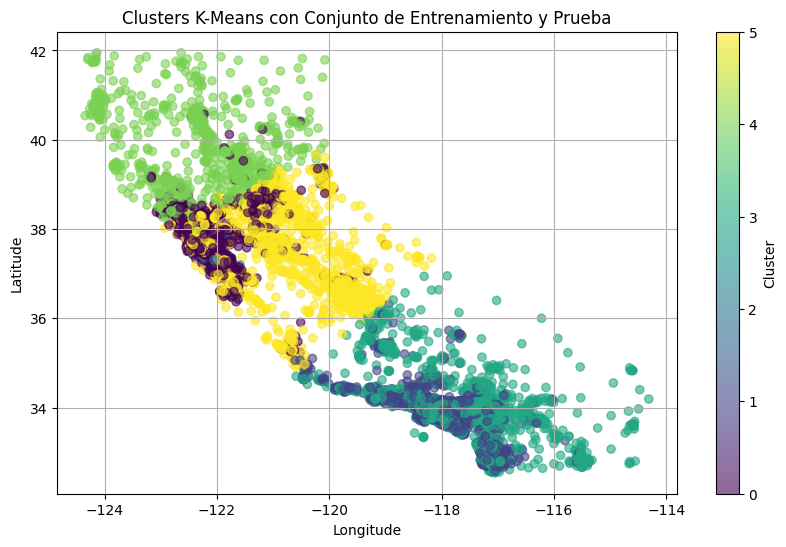

In [6]:
predictions = KMeans_Model.predict(X_test_scaled)
X_test['cluster'] = predictions.astype(int)

df_all = pd.concat([X_train, X_test])
plt.figure(figsize=(10, 6))
plt.scatter(df_all['Longitude'], df_all['Latitude'], c=df_all['cluster'], cmap='viridis', alpha=0.6)
plt.title('Clusters K-Means con Conjunto de Entrenamiento y Prueba')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

cluster
0     5.371446
1     5.212822
2    10.327442
3     2.724231
4     2.402593
5     2.813471
Name: MedInc, dtype: float64


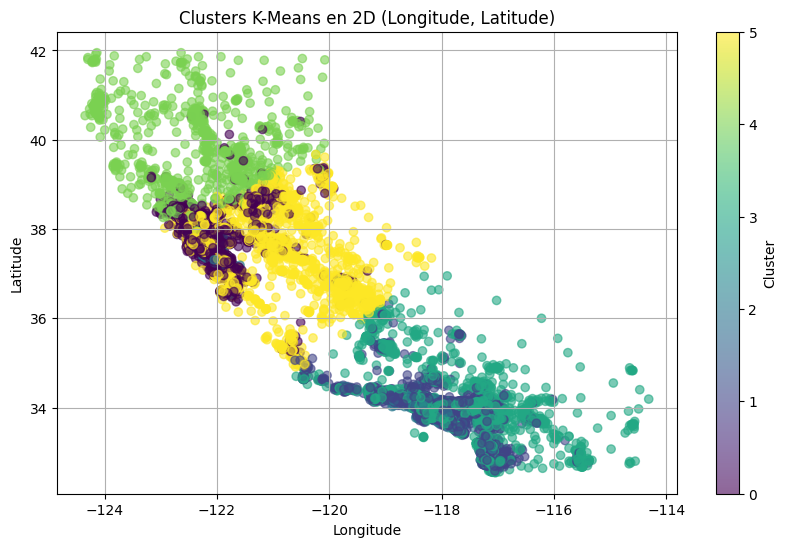

In [ ]:
cluster_summary = df_all.groupby('cluster')['MedInc'].mean()
print(cluster_summary)

plt.figure(figsize=(10, 6))
plt.scatter(df_all['Longitude'], df_all['Latitude'], c=df_all['cluster'], cmap='viridis', alpha=0.6)
plt.title('Clusters K-Means en 2D (Longitude, Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [8]:

y_train_cluster = X_train['cluster']
X_train_sup = X_train.drop(columns=['cluster'])

y_test_cluster = X_test['cluster']
X_test_sup = X_test.drop(columns=['cluster'])

model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(X_train_sup, y_train_cluster)

y_pred_RF = model_RF.predict(X_test_sup)
classification_report(y_test_cluster, y_pred_RF)


'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99       557\n           1       1.00      1.00      1.00       897\n           2       1.00      0.97      0.99       116\n           3       1.00      1.00      1.00      1397\n           4       0.98      0.99      0.99       246\n           5       0.99      0.99      0.99       915\n\n    accuracy                           0.99      4128\n   macro avg       0.99      0.99      0.99      4128\nweighted avg       0.99      0.99      0.99      4128\n'

In [9]:
dump(KMeans_Model, open("modelo_kmeans.sav", "wb"))